In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Set the Seaborn style to whitegrid
sns.set(style='whitegrid')

# Load the datasets (ensure paths are updated to where your files are located)
files = {
    'A2C': 'C:/_source/pesbiu2.0/A2C.xlsx',
    'DDDQN': 'C:/_source/pesbiu2.0/DDDQN.xlsx',
    'DQN': 'C:/_source/pesbiu2.0/DQN.xlsx',
    'Fallback_DDDQN': 'C:/_source/pesbiu2.0/FallDDDQN.xlsx',
    'Hybrid': 'C:/_source/pesbiu2.0/hybrid.xlsx',
    'Static': 'C:/_source/pesbiu2.0/static.xlsx',
    'Threshold': 'C:/_source/pesbiu2.0/treshold.xlsx',
}

# Define a custom color palette for all algorithms
color_palette = {
    'A2C': '#ff7f0e',
    'DDDQN': '#1f77b4',
    'DQN': '#9467bd',
    'Fallback_DDDQN': '#8c564b',
    'Hybrid': '#2ca02c',
    'Static': '#d62728',
    'Threshold': '#FFEE58'
}

# Read each file into a DataFrame
energy_savings = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
})
latency_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Latency_Before': [],
    'Avg_Latency_After': []
})
throughput_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Throughput_Before': [],
    'Avg_Throughput_After': []
})
overall_metrics = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
    'Avg_Latency_After': [],
    'Avg_Throughput_After': []
})

In [39]:

# Extract energy saving, latency, and throughput data from each dataset and add it to combined DataFrames
for algorithm, file_path in files.items():
    df = pd.read_excel(file_path)
    if 'Avg_Energy_Saving' in df.columns and 'Avg_Energy_Before' in df.columns:
        energy_data = df[['Avg_Energy_Saving', 'Avg_Energy_Before']].copy()
        energy_data['Algorithm'] = algorithm
        energy_savings = pd.concat([energy_savings, energy_data], ignore_index=True)

    if 'Avg_Latency_Before' in df.columns and 'Avg_Latency_After' in df.columns:
        latency_data_temp = df[['Avg_Latency_Before', 'Avg_Latency_After']].copy()
        latency_data_temp['Algorithm'] = algorithm
        latency_data = pd.concat([latency_data, latency_data_temp], ignore_index=True)
    
    if 'Avg_Throughput_Before' in df.columns and 'Avg_Throughput_After' in df.columns:
        throughput_data_temp = df[['Avg_Throughput_Before', 'Avg_Throughput_After']].copy()
        throughput_data_temp['Algorithm'] = algorithm
        throughput_data = pd.concat([throughput_data, throughput_data_temp], ignore_index=True)



C:\Users\xkolac15\AppData\Local\Temp\ipykernel_2716\4105029204.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=energy_savings_sorted, x='Algorithm', y='Avg_Energy_Saving', ci=None, palette=color_palette)
C:\Users\xkolac15\AppData\Local\Temp\ipykernel_2716\4105029204.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=energy_savings_sorted, x='Algorithm', y='Avg_Energy_Saving', ci=None, palette=color_palette)


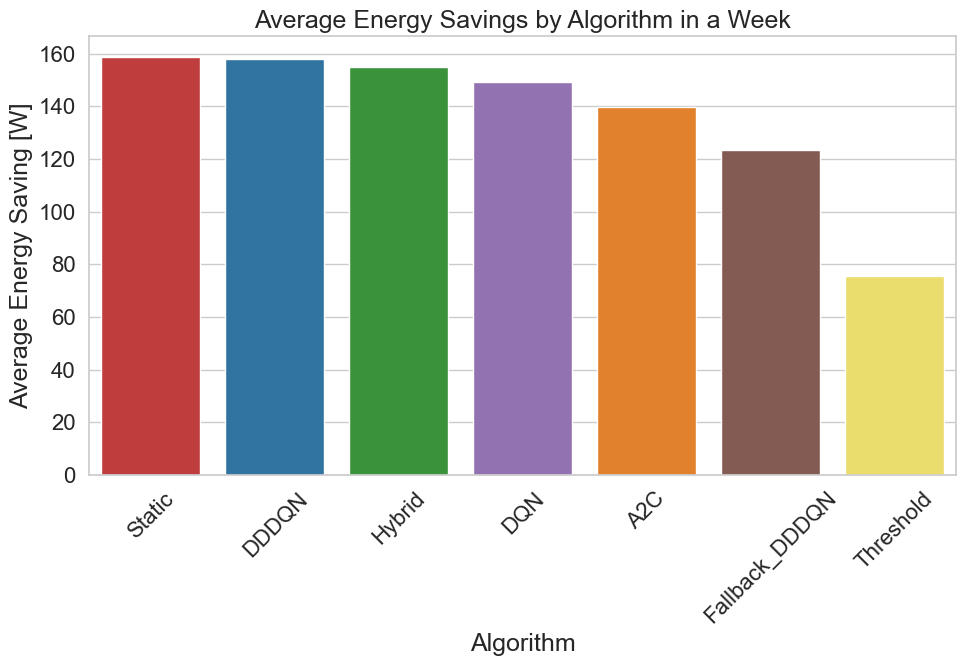

C:\Users\xkolac15\AppData\Local\Temp\ipykernel_2716\4105029204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=energy_savings, x='Algorithm', y='Avg_Energy_Saving', palette=color_palette)


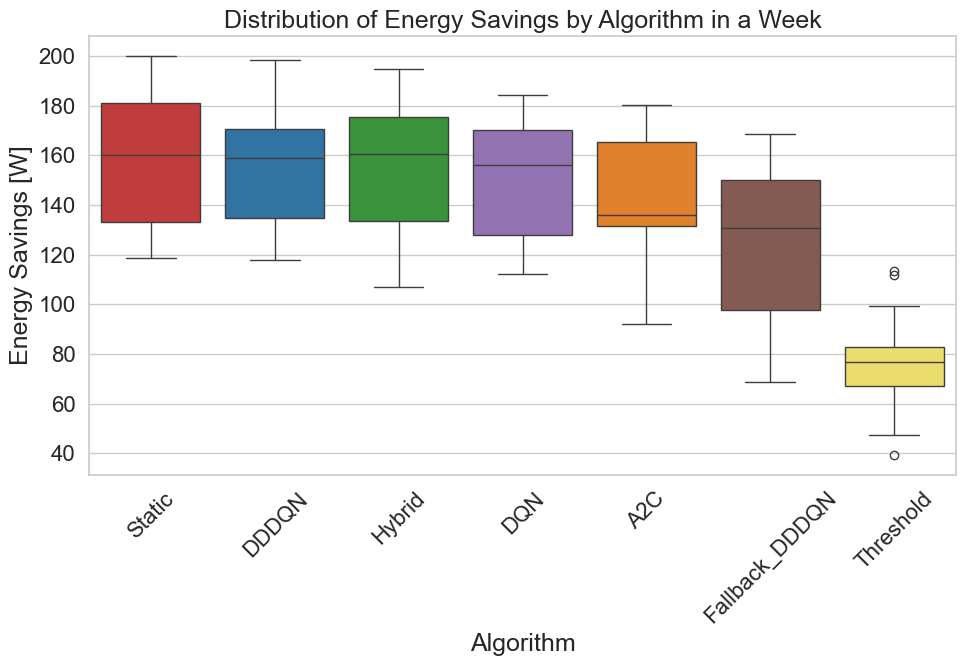

In [40]:
# Sort the DataFrame by average energy savings in descending order
energy_savings_sorted = energy_savings.groupby('Algorithm').mean().sort_values(by='Avg_Energy_Saving', ascending=False).reset_index()

# Set the font size for the plots
plt.rc('font', size=18)

# Plotting the Bar Chart for Average Energy Savings by Algorithm (sorted from best to worst)
plt.figure(figsize=(10, 7))
sns.barplot(data=energy_savings_sorted, x='Algorithm', y='Avg_Energy_Saving', ci=None, palette=color_palette)
plt.title('Average Energy Savings by Algorithm in a Week', fontsize=18)
plt.xlabel('Algorithm', fontsize=18)
plt.ylabel('Average Energy Saving [W]', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

# Plotting the Box Plot for Distribution of Energy Savings by Algorithm (sorted from best to worst)
plt.figure(figsize=(10, 7))
energy_savings['Algorithm'] = pd.Categorical(energy_savings['Algorithm'], categories=energy_savings_sorted['Algorithm'], ordered=True)
sns.boxplot(data=energy_savings, x='Algorithm', y='Avg_Energy_Saving', palette=color_palette)
plt.title('Distribution of Energy Savings by Algorithm in a Week', fontsize=18)
plt.xlabel('Algorithm', fontsize=18)
plt.ylabel('Energy Savings [W]', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [37]:
print("Exact average energy savings for each algorithm:")
print(energy_savings_sorted[['Algorithm', 'Avg_Energy_Saving']])

Exact average energy savings for each algorithm:
        Algorithm  Avg_Energy_Saving
0          Static         158.622754
1           DDDQN         157.941856
2          Hybrid         154.795670
3             DQN         149.317600
4             A2C         139.658995
5  Fallback_DDDQN         123.303563
6       Threshold          75.684391


In [41]:
# Displaying exact values for average energy savings and energy before for each algorithm
print("Exact average energy usage and savings for each algorithm:")
print(energy_savings_sorted[['Algorithm', 'Avg_Energy_Before', 'Avg_Energy_Saving']])


Exact average energy usage and savings for each algorithm:
        Algorithm  Avg_Energy_Before  Avg_Energy_Saving
0          Static         383.190394         158.622754
1           DDDQN         383.190394         157.941856
2          Hybrid         383.190394         154.795670
3             DQN         383.190394         149.317600
4             A2C         383.190394         139.658995
5  Fallback_DDDQN         383.190394         123.303563
6       Threshold         383.190394          75.684391


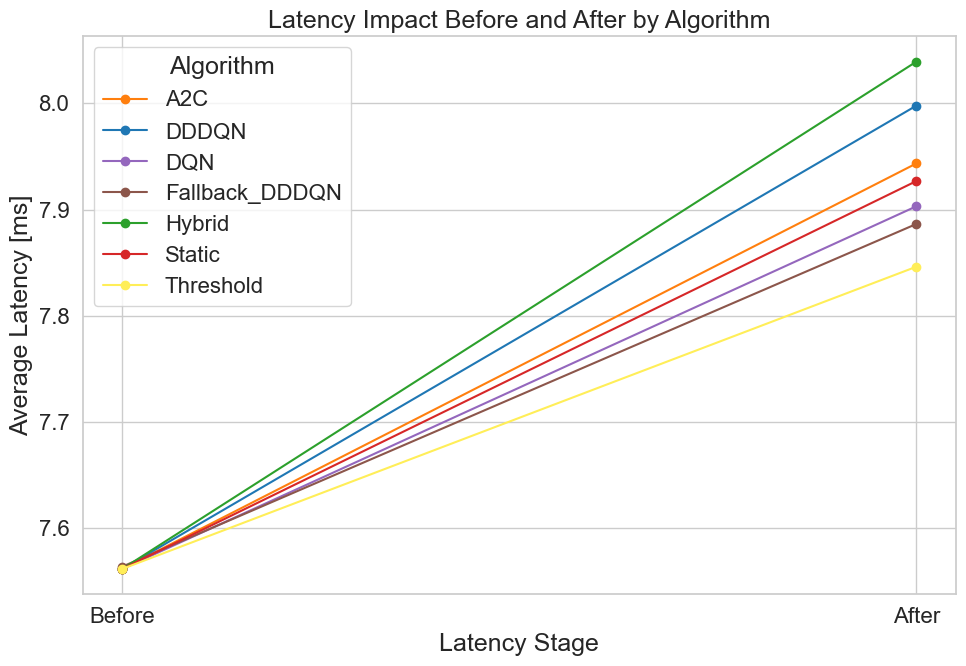

In [30]:
# Plotting Latency Impact Analysis
# Line Chart: Avg Latency Before and After for each Algorithm
plt.figure(figsize=(10, 7))
for algorithm in latency_data['Algorithm'].unique():
    subset = latency_data[latency_data['Algorithm'] == algorithm]
    plt.plot(['Before', 'After'], [subset['Avg_Latency_Before'].mean(), subset['Avg_Latency_After'].mean()], 
             marker='o', label=algorithm, color=color_palette[algorithm])
plt.title('Latency Impact Before and After by Algorithm', fontsize=18)
plt.xlabel('Latency Stage', fontsize=18)
plt.ylabel('Average Latency [ms]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Algorithm', fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.show()

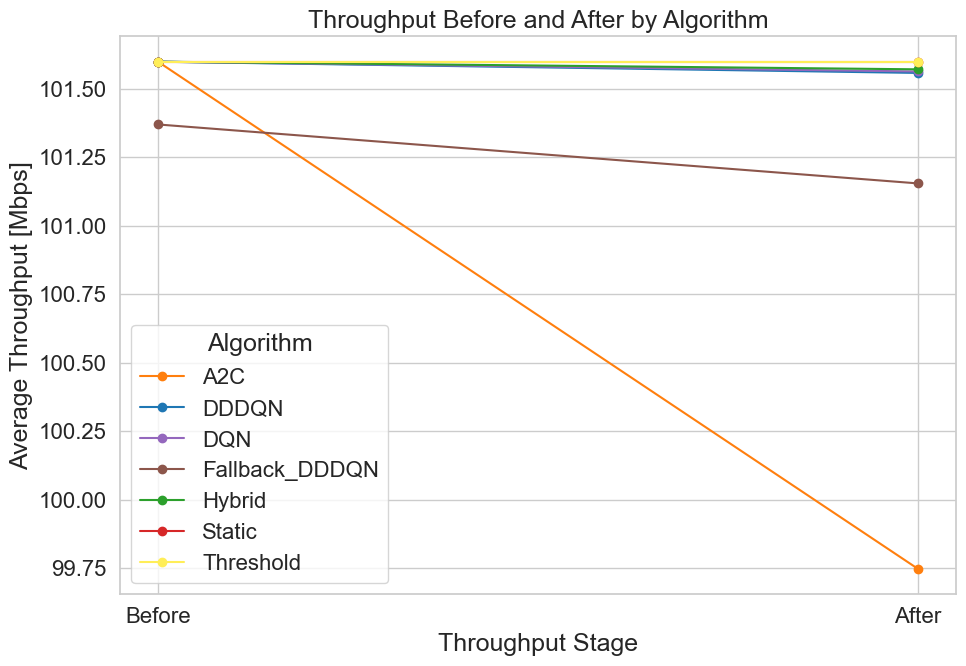

In [5]:
# Line Chart: Throughput Before vs After for each Algorithm
plt.figure(figsize=(10, 7))
for algorithm in throughput_data['Algorithm'].unique():
    subset = throughput_data[throughput_data['Algorithm'] == algorithm]
    plt.plot(['Before', 'After'], [subset['Avg_Throughput_Before'].mean(), subset['Avg_Throughput_After'].mean()], 
             marker='o', label=algorithm, color=color_palette[algorithm])
plt.title('Throughput Before and After by Algorithm', fontsize=18)
plt.xlabel('Throughput Stage', fontsize=18)
plt.ylabel('Average Throughput [Mbps]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Algorithm', fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.show()

In [6]:
# Debug: Print average throughput before and after for each algorithm
for algorithm in throughput_data['Algorithm'].unique():
    subset = throughput_data[throughput_data['Algorithm'] == algorithm]
    avg_throughput_before = subset['Avg_Throughput_Before'].dropna().mean()
    avg_throughput_after = subset['Avg_Throughput_After'].dropna().mean()
    print(f"{algorithm} - Before: {avg_throughput_before}, After: {avg_throughput_after}")


A2C - Before: 101.59968223809524, After: 99.74802171428571
DDDQN - Before: 101.59968223809524, After: 101.55865252380951
DQN - Before: 101.59968223809524, After: 101.56404952380952
Fallback_DDDQN - Before: 101.37049876190477, After: 101.15531347619047
Hybrid - Before: 101.59968223809524, After: 101.57181457142856
Static - Before: 101.59968223809524, After: 101.59968223809524
Threshold - Before: 101.59968223809524, After: 101.59968223809524


In [ ]:
# Debug: Print average Energy_Saving before and after for each algorithm
for algorithm in throughput_data['Algorithm'].unique():
    subset = throughput_data[throughput_data['Algorithm'] == algorithm]
    avg_throughput_before = subset['Avg_Throughput_Before'].dropna().mean()
    avg_throughput_after = subset['Avg_Throughput_After'].dropna().mean()
    print(f"{algorithm} - Before: {avg_throughput_before}, After: {avg_throughput_after}")


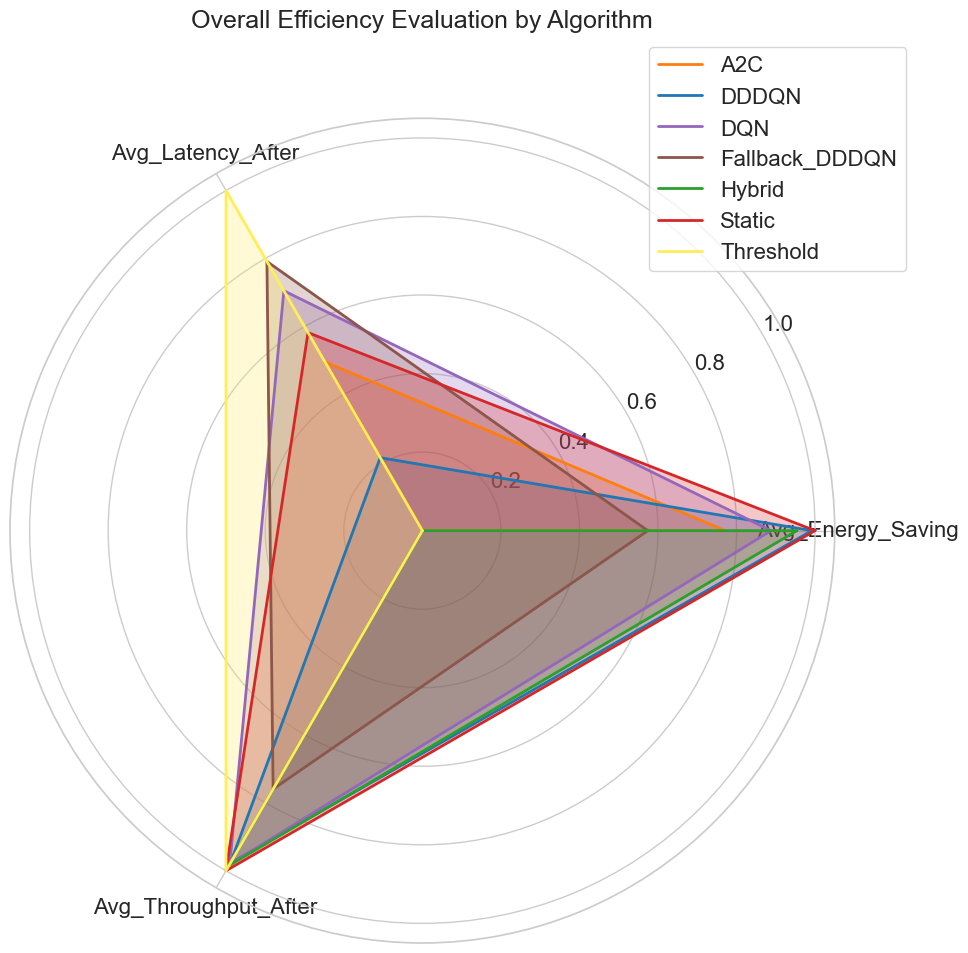

In [31]:
# Calculating average metrics for each algorithm and adding to overall_metrics
for algorithm in files.keys():
    df = pd.read_excel(files[algorithm])
    avg_energy_saving = df['Avg_Energy_Saving'].mean() if 'Avg_Energy_Saving' in df.columns else 0
    avg_latency_after = df['Avg_Latency_After'].mean() if 'Avg_Latency_After' in df.columns else 0
    avg_throughput_after = df['Avg_Throughput_After'].mean() if 'Avg_Throughput_After' in df.columns else 0
    overall_metrics = pd.concat([overall_metrics, pd.DataFrame({
        'Algorithm': [algorithm],
        'Avg_Energy_Saving': [avg_energy_saving],
        'Avg_Latency_After': [avg_latency_after],
        'Avg_Throughput_After': [avg_throughput_after]
    })], ignore_index=True)

# Normalizing the metrics to bring them all to a 0-1 range
metrics = ['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']
normalized_metrics = overall_metrics.copy()

for metric in metrics:
    min_value = overall_metrics[metric].min()
    max_value = overall_metrics[metric].max()
    # Normalize the values to range 0-1
    if metric == 'Avg_Latency_After':
        # Invert latency so that lower latency is better (closer to 1)
        normalized_metrics[metric] = (max_value - overall_metrics[metric]) / (max_value - min_value) if max_value - min_value != 0 else 0
    else:
        normalized_metrics[metric] = (overall_metrics[metric] - min_value) / (max_value - min_value) if max_value - min_value != 0 else 0

# Prepare the Radar Chart
categories = metrics
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the circle

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plotting each algorithm's normalized values on the radar chart
for i in range(len(normalized_metrics)):
    values = normalized_metrics.loc[i, metrics].tolist()
    values += values[:1]  # Closing the loop for radar chart

    algorithm = normalized_metrics.loc[i, 'Algorithm']
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=algorithm, color=color_palette[algorithm])
    ax.fill(angles, values, alpha=0.25, color=color_palette[algorithm])

# Formatting the radar chart
plt.xticks(angles[:-1], categories, fontsize=16)
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=16)
plt.title('Overall Efficiency Evaluation by Algorithm', size=18, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\xkolac15\AppData\Local\Temp\ipykernel_2716\2298196059.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overall_metrics_sorted, x='Algorithm', y='Efficiency_Score', palette=colors)


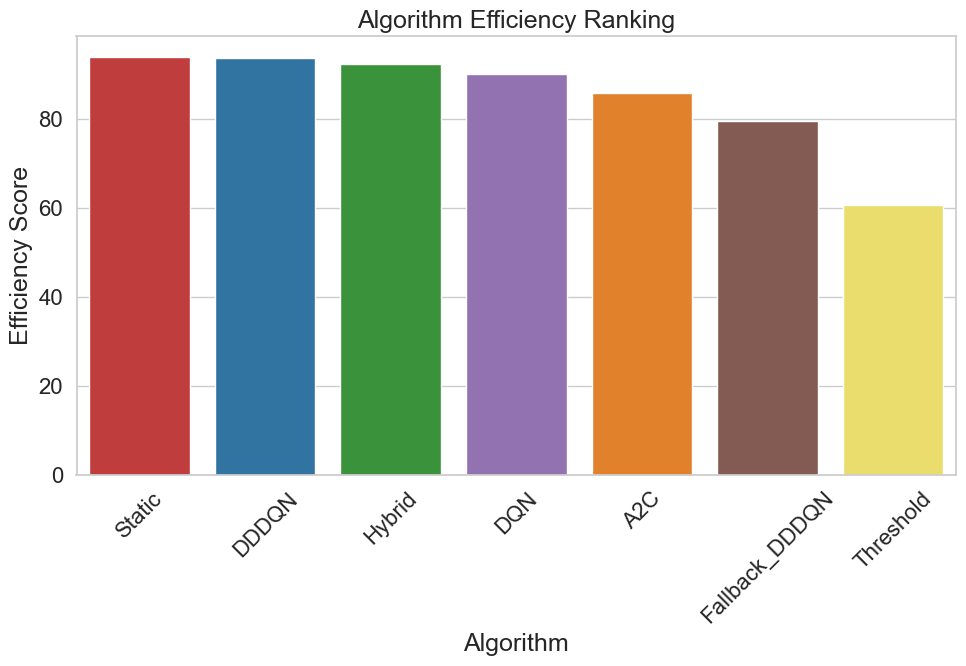

In [11]:
# Algorithm Efficiency Ranking
# Ranking Algorithms based on combined metrics
overall_metrics['Efficiency_Score'] = (
    overall_metrics['Avg_Energy_Saving'] * 0.4 + 
    (1 / (overall_metrics['Avg_Latency_After'] + 1e-5)) * 0.3 + 
    overall_metrics['Avg_Throughput_After'] * 0.3
)
overall_metrics_sorted = overall_metrics.sort_values(by='Efficiency_Score', ascending=False).reset_index(drop=True)

# Create a color list using the custom color palette to ensure consistency
colors = [color_palette[algorithm] for algorithm in overall_metrics_sorted['Algorithm']]

# Plotting the Efficiency Ranking
plt.figure(figsize=(10, 7))
sns.barplot(data=overall_metrics_sorted, x='Algorithm', y='Efficiency_Score', palette=colors)
plt.title('Algorithm Efficiency Ranking', fontsize=18)
plt.xlabel('Algorithm', fontsize=18)
plt.ylabel('Efficiency Score', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


Components of the Efficiency Score:
Average Energy Savings (Avg_Energy_Saving):

This metric represents how much energy each algorithm is able to save on average.
Higher energy savings are better, so this component positively contributes to the efficiency score.
Average Latency After (Avg_Latency_After):

This measures the average latency experienced after the application of each algorithm.
Lower latency is better, as it implies faster response times. To account for this in the efficiency score, we take the reciprocal (1 / Avg_Latency_After), so that smaller values of latency contribute more positively to the score.
Average Throughput After (Avg_Throughput_After):

This represents the average data throughput after the algorithm is applied, which indicates network capacity and performance.
Higher throughput is better, so this component directly adds to the efficiency score.
Weighting the Metrics:
Each metric contributes to the overall efficiency score, but with different weights:

Energy Savings: 0.4
Latency (inverse): 0.3
Throughput: 0.3
The efficiency score is calculated as follows:

Efficiency Score
=
(
Avg Energy Saving
×
0.4
)
+
(
1
Avg Latency After
+
1
𝑒
−
5
×
0.3
)
+
(
Avg Throughput After
×
0.3
)
Efficiency Score=(Avg Energy Saving×0.4)+( 
Avg Latency After+1e−5
1
​
 ×0.3)+(Avg Throughput After×0.3)
Explanation of the Weights:
Energy Savings (40%): Energy efficiency is given the highest weight since it’s a primary goal in most network optimization efforts, especially in 5G networks where minimizing energy consumption is crucial for sustainability.
Latency (30%): Latency is also important, particularly for applications requiring quick response times, such as real-time communications or gaming. Lower latency contributes to better quality of service.
Throughput (30%): Throughput is significant in ensuring the network can handle more data and serve more users, which is crucial in maximizing capacity and maintaining quality.
Purpose of Adding 1e-5 to Latency:
The term 1e-5 is added to the latency to prevent division by zero in case the latency value is extremely small or zero. This ensures the calculation remains stable without numerical issues.

Overall Meaning:
The efficiency score is a balanced way of assessing the algorithms across multiple dimensions of network performance. By combining energy savings, latency, and throughput, you can determine which algorithm offers the best overall trade-off between these key metrics, based on your specific goals and priorities.

Let me know if you need further clarification or want to adjust the weighting of the components!





You said:
Can you give me some reference to this efficiency score?
ChatGPT said:
ChatGPT




ChatGPT said:
ChatGPT
The efficiency score used in the script is an original metric designed for this specific project and is not directly drawn from existing literature. However, the approach aligns well with multi-criteria decision analysis (MCDA), which is a widely used methodology in decision science to evaluate alternatives across multiple performance criteria.

Below, I will provide some references that are conceptually related to this type of efficiency evaluation:

1. Weighted Scoring Methods in MCDA
The efficiency score in the code uses weighted linear combination to aggregate different metrics. This approach is similar to methods like Simple Additive Weighting (SAW), which are common in MCDA for evaluating alternatives based on multiple attributes.
Reference:
Hwang, C. L., & Yoon, K. (1981). Multiple Attribute Decision Making: Methods and Applications. Springer-Verlag. This book is a foundational reference in the area of MCDA and covers weighted scoring methods similar to the efficiency score used here.
2. Efficiency Score Methods in Network Optimization
Efficiency metrics that combine factors like latency, throughput, and energy consumption are often found in research papers focusing on network optimization, particularly in 5G and beyond. The idea of using such metrics to evaluate algorithms is inspired by the focus on improving overall Quality of Service (QoS) and Quality of Experience (QoE).
Reference:
Boccardi, F., Heath, R. W., Lozano, A., Marzetta, T. L., & Popovski, P. (2014). Five disruptive technology directions for 5G. IEEE Communications Magazine, 52(2), 74-80. This paper discusses the importance of energy efficiency, latency, and throughput as key components in evaluating 5G technologies.
3. Data Envelopment Analysis (DEA) for Efficiency Scores
The approach also has some parallels with Data Envelopment Analysis (DEA), which is used to evaluate the relative efficiency of decision-making units based on multiple inputs and outputs. The aggregation of throughput, latency, and energy savings mirrors the DEA idea of incorporating different performance measures.
Reference:
Cooper, W. W., Seiford, L. M., & Zhu, J. (2004). Handbook on Data Envelopment Analysis. Springer US. DEA is widely used to assess efficiency, combining several inputs and outputs into an efficiency score, somewhat akin to the aggregation process seen here.
4. Quality of Service (QoS) Metrics in Telecommunications
Weighting various network performance metrics is common in the analysis of QoS in telecommunications. The efficiency score is conceptually similar to QoS evaluations, which often use weighted combinations of delay, bandwidth, and reliability.
Reference:
Chen, S., & Zhao, J. (2014). The requirements, challenges, and technologies for 5G of terrestrial mobile telecommunication. IEEE Communications Magazine, 52(5), 36-43. This paper explains the importance of balancing multiple QoS metrics such as energy efficiency, latency, and throughput in 5G networks.
Summary:
The efficiency score in the script is designed to evaluate multiple critical aspects of network performance: energy savings, latency, and throughput. It does this by normalizing these metrics and weighting them according to their importance, much like traditional multi-criteria decision-making methodologies. The specific weights (0.4 for energy savings, 0.3 for latency, and 0.3 for throughput) reflect a practical consideration of the priorities for your particular use case. These weights can be adjusted depending on different performance priorities, as seen in QoS-related research.

Let me know if you need further guidance or more detailed references on this topic!

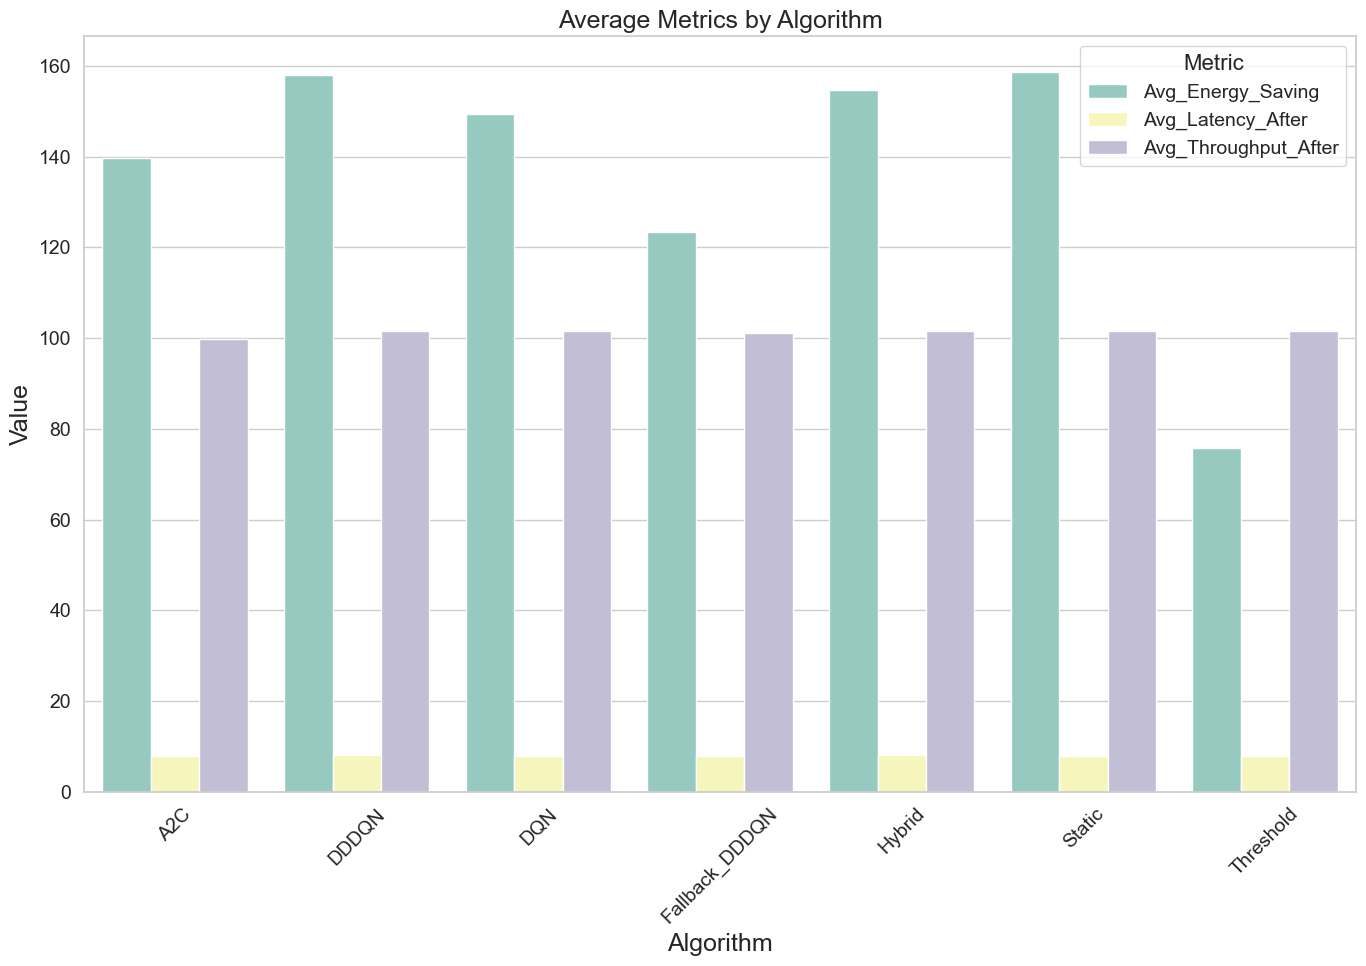

In [9]:
# Bar Plot for Average Metrics
# Plotting Average Metrics (Energy Saving, Latency, Throughput) for each Algorithm
overall_metrics_melted = overall_metrics.melt(id_vars='Algorithm', value_vars=['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After'], var_name='Metric', value_name='Value')
plt.figure(figsize=(14, 10))
sns.barplot(data=overall_metrics_melted, x='Algorithm', y='Value', hue='Metric', palette='Set3')
plt.title('Average Metrics by Algorithm', fontsize=18)
plt.xlabel('Algorithm', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Metric', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()
